# Explore here

Paso 1: Carga del conjunto de datos
    

In [86]:
pip install pandas


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
file="https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

In [88]:
data=pd.read_csv(file)

In [89]:
data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


Paso 2: Construye y analiza la serie temporal

In [90]:
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date
data=data.set_index("date")

In [91]:
data

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


In [93]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 56.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 62.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 57.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 7.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


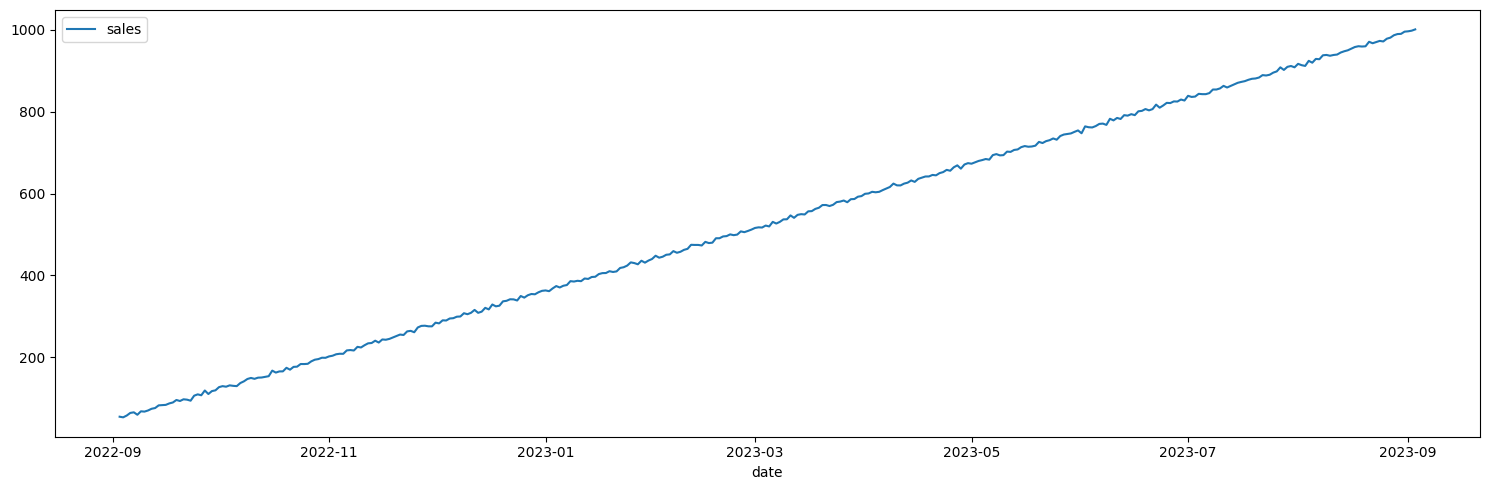

In [94]:


import seaborn as sns
import matplotlib.pyplot as plt

fig, axis=plt.subplots(figsize=(15,5))
sns.lineplot(data=data)
plt.tight_layout()
plt.show()

DECOMPOSICION DE LA SERIE

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [96]:
decompose=seasonal_decompose(data,period=12)
decompose

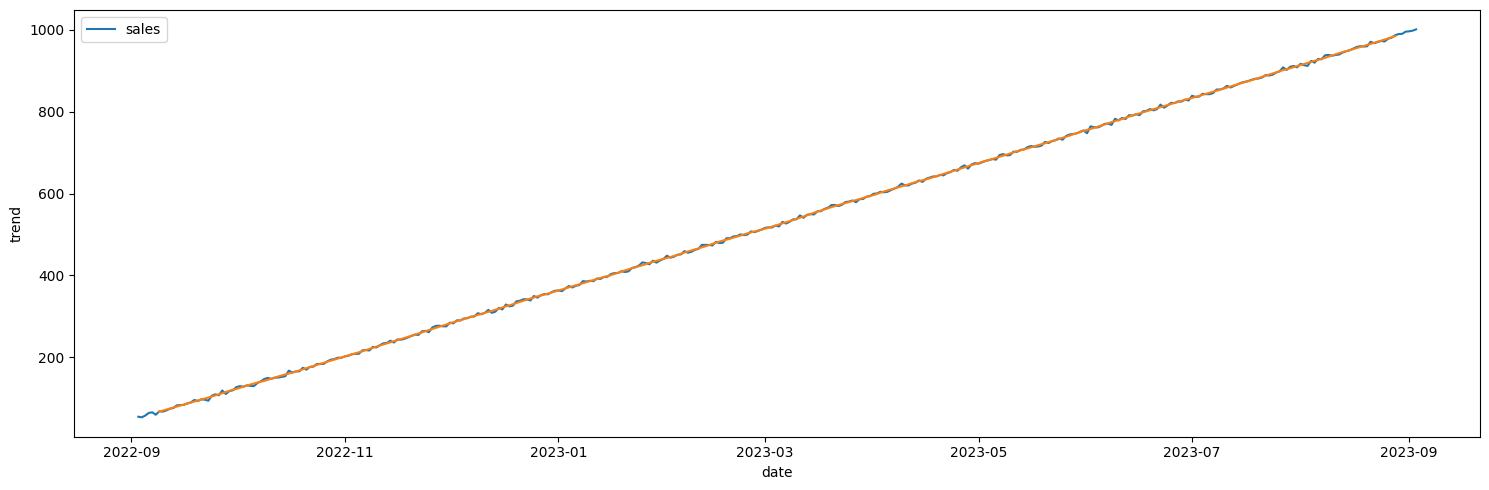

In [97]:
tendencia=decompose.trend

fig, axis =plt.subplots(figsize=(15,5))
sns.lineplot(data=data)
sns.lineplot(data=tendencia)
plt.tight_layout()
plt.show()

observamos una clara tendencia positiva a lo largo de los años y esperamos siga asi 

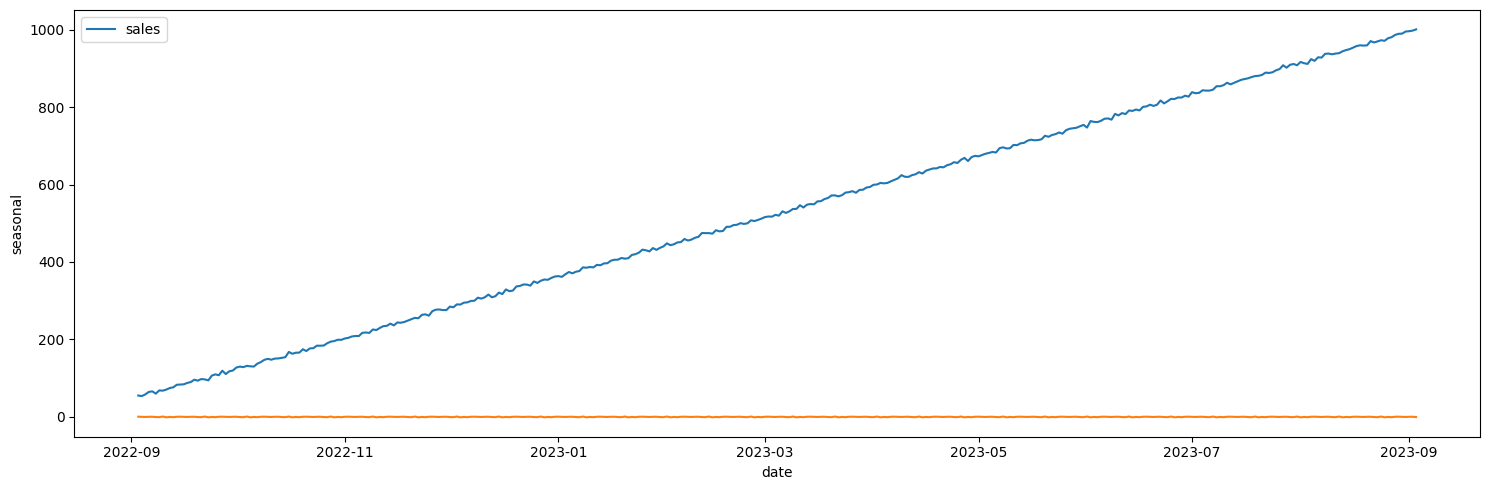

In [98]:
estacion=decompose.seasonal

fig, axis =plt.subplots(figsize=(15,5))
sns.lineplot(data=data)
sns.lineplot(data=estacion)
plt.tight_layout()
plt.show()

In [99]:
from statsmodels.tsa.stattools import adfuller

In [100]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

In [101]:
test_stationarity(data)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

aunque con las graficas anteriores podiamos apreciar que claramente no era estacional con la prueba adfuller y el pvalue por encima del 0.05% podemos decir que no es estacional

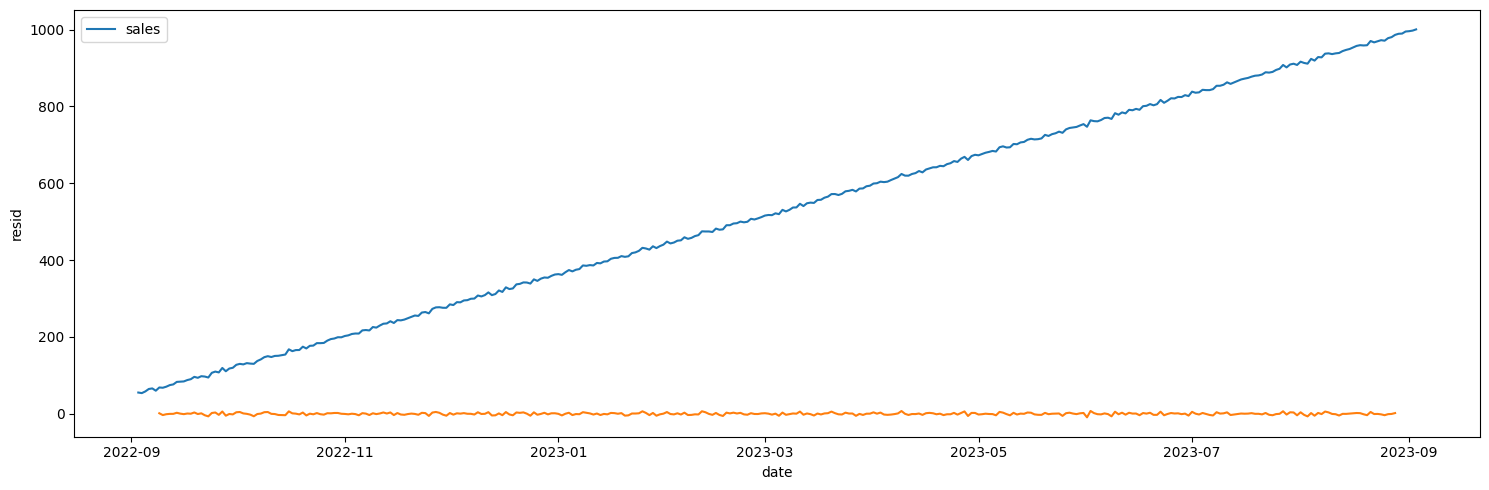

In [102]:
residual=decompose.resid

fig, axis = plt.subplots(figsize=(15,5))
sns.lineplot(data=data)
sns.lineplot(data=residual)
plt.tight_layout()
plt.show()

no encuentro rastros de residuales de años pasados en el comportamiento de futuros

In [103]:
from statsmodels.graphics.tsaplots import plot_acf

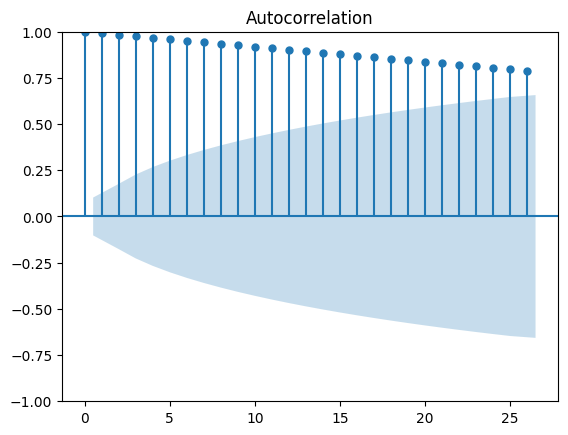

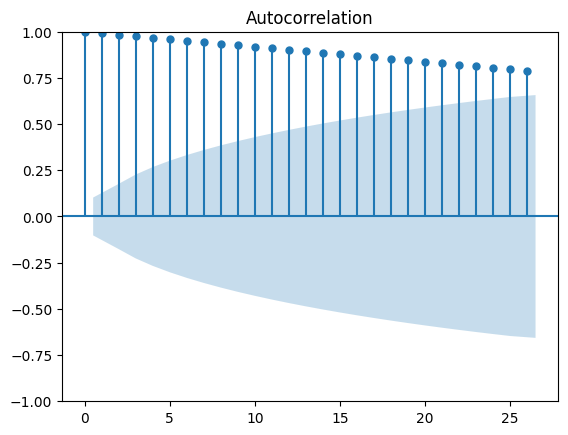

In [104]:
plot_acf(data)

las barras estan muy cerca de 1 lo que muestra una fuerte correlacion con sus valores anteriores, ninguna de estas lineas sigue o se acerca al patron de la sombra esto demuestra que la correlacion es muy elevada. Antes de aplicar ARIMA hay que convertirla a estacional y considerar tecnicas de diferenciación

In [105]:
data

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


In [106]:
data_estacional=data.diff(7).dropna()
test_stationarity(data_estacional)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -6.484758e+00
p-value                        1.269016e-08
#Lags Used                     1.400000e+01
Number of Observations Used    3.440000e+02
Critical Value (1%)           -3.449503e+00
Critical Value (5%)           -2.869979e+00
Critical Value (10%)          -2.571266e+00
dtype: float64

Ya es temporal

In [108]:
data_estacional

,sales
date,
2022-09-10,12.472949
2022-09-11,16.709050
2022-09-12,16.514760
2022-09-13,11.928629
2022-09-14,16.979325
...,...
2023-08-30,20.187372
2023-08-31,22.578291
2023-09-01,24.768282


In [149]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data_estacional['sales'], order=(0, 0, 1))

/workspaces/time-series-forecast/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/time-series-forecast/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/workspaces/time-series-forecast/myenv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [150]:

model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  359
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -992.138
Date:                Fri, 25 Oct 2024   AIC                           1990.276
Time:                        20:30:04   BIC                           2001.926
Sample:                    09-10-2022   HQIC                          1994.909
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1823      0.189     96.263      0.000      17.812      18.553
ma.L1         -0.0744      0.052     -1.424      0.154      -0.177       0.028
sigma2        14.7219      1.077     13.666      0.0

In [151]:

steps = 10
forecast = model_fit.forecast(steps=steps)

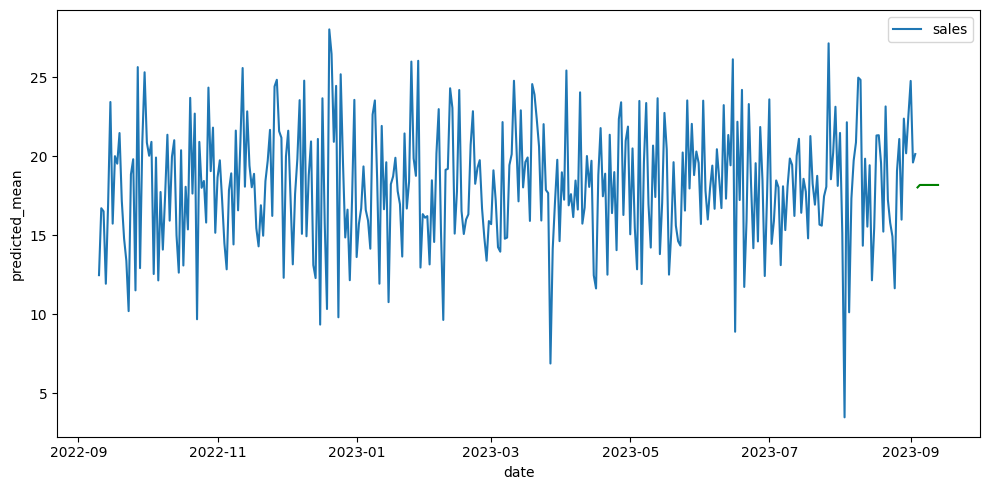

In [152]:


fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = data_estacional)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

Tuve inconvenientes con el pmdarima es incompatible con versiones de numpy, intente cambiarlas, upgrades,downgrades, cambiar a otro python pero no corria. Use ARIMA intentando buscar un valor para los hiperparametros y predecir.